In [1]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_vgg11_bn.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/helper.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/metrics.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/model_blocks.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/trainer.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/visualizer.py

--2019-03-30 20:40:47--  https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/data_loader.py [following]
--2019-03-30 20:40:48--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/data_loader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1837 (1.8K) [text/plain]
Saving to: ‘data_loader.py’

data_loader.py      100%[===================>]   1.79K  --.-KB/s    in 0s      

2019-03-30 20:40:48 (38.7 MB/s) - ‘data_loader.py’ saved [1837/1837]

--2019-0

In [2]:
import numpy as np
import random
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from data_loader import *
from extractNet_connected_vgg11_bn import *
from helper import *
from metrics import *
from model_blocks import *
from trainer import *
from visualizer import *

In [3]:
!rm -rf __MACOSX
!rm -rf *.zip
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_person_vehicle.zip
!unzip data_person_vehicle.zip
!rm -rf __MACOSX
!rm -rf *.zip

--2019-03-30 20:40:54--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_person_vehicle.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/MNRKhan/aps360-project/master/datasets/train2014/data_person_vehicle.zip [following]
--2019-03-30 20:40:55--  https://media.githubusercontent.com/media/MNRKhan/aps360-project/master/datasets/train2014/data_person_vehicle.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141567675 (135M) [application/zip]
Saving to: ‘data_person_vehicle.zip’

data_person_vehicle 100%[===================>] 135.01M  

  inflating: data/images/9135.jpg    
  inflating: data/images/6206.jpg    
  inflating: data/images/1569.jpg    
  inflating: data/images/7118.jpg    
  inflating: data/images/4411.jpg    
  inflating: data/images/2060.jpg    
  inflating: data/images/5069.jpg    
  inflating: data/images/2706.jpg    
  inflating: data/images/3418.jpg    
  inflating: data/images/4377.jpg    
  inflating: data/images/943.jpg     
  inflating: data/images/9653.jpg    
  inflating: data/images/6560.jpg    
  inflating: data/images/5041.jpg    
  inflating: data/images/3430.jpg    
  inflating: data/images/7656.jpg    
  inflating: data/images/8565.jpg    
  inflating: data/images/1227.jpg    
  inflating: data/images/6548.jpg    
  inflating: data/images/1541.jpg    
  inflating: data/images/7130.jpg    
  inflating: data/images/8203.jpg    
  inflating: data/images/4439.jpg    
  inflating: data/images/3356.jpg    
  inflating: data/images/2048.jpg    
  inflating: data/images/5727.jpg    
  inflating:

  inflating: data/images/7509.jpg    
  inflating: data/images/9242.jpg    
  inflating: data/images/6171.jpg    
  inflating: data/images/5478.jpg    
  inflating: data/images/2317.jpg    
  inflating: data/images/3009.jpg    
  inflating: data/images/4766.jpg    
  inflating: data/images/2303.jpg    
  inflating: data/images/4772.jpg    
  inflating: data/images/8148.jpg    
  inflating: data/images/9256.jpg    
  inflating: data/images/6165.jpg    
  inflating: data/images/9530.jpg    
  inflating: data/images/6603.jpg    
  inflating: data/images/4014.jpg    
  inflating: data/images/2465.jpg    
  inflating: data/images/5685.jpg    
  inflating: data/images/7092.jpg    
  inflating: data/images/177.jpg     
  inflating: data/images/1385.jpg    
  inflating: data/images/611.jpg     
  inflating: data/images/89.jpg      
  inflating: data/images/9901.jpg    
  inflating: data/images/3592.jpg    
  inflating: data/images/2854.jpg    
  inflating: data/images/3586.jpg    
  inflating:

  inflating: data/images/8764.jpg    
  inflating: data/images/3631.jpg    
  inflating: data/images/5240.jpg    
  inflating: data/images/5526.jpg    
  inflating: data/images/2249.jpg    
  inflating: data/images/3157.jpg    
  inflating: data/images/4638.jpg    
  inflating: data/images/7331.jpg    
  inflating: data/images/8002.jpg    
  inflating: data/images/1998.jpg    
  inflating: data/images/1740.jpg    
  inflating: data/images/1973.jpg    
  inflating: data/images/3802.jpg    
  inflating: data/images/9491.jpg    
  inflating: data/images/8957.jpg    
  inflating: data/images/559.jpg     
  inflating: data/images/9485.jpg    
  inflating: data/images/8943.jpg    
  inflating: data/images/3816.jpg    
  inflating: data/images/1967.jpg    
  inflating: data/images/3180.jpg    
  inflating: data/images/4837.jpg    
  inflating: data/images/1797.jpg    
  inflating: data/images/203.jpg     
  inflating: data/images/6946.jpg    
  inflating: data/images/7480.jpg    
  inflating:

  inflating: data/images/9296.jpg    
  inflating: data/images/8188.jpg    
  inflating: data/images/1812.jpg    
  inflating: data/images/9282.jpg    
  inflating: data/images/1806.jpg    
  inflating: data/images/8822.jpg    
  inflating: data/images/3977.jpg    
  inflating: data/images/3744.jpg    
  inflating: data/images/5335.jpg    
  inflating: data/images/1153.jpg    
  inflating: data/images/8611.jpg    
  inflating: data/images/7522.jpg    
  inflating: data/images/8177.jpg    
  inflating: data/images/7244.jpg    
  inflating: data/images/1635.jpg    
  inflating: data/images/9269.jpg    
  inflating: data/images/5453.jpg    
  inflating: data/images/4995.jpg    
  inflating: data/images/3022.jpg    
  inflating: data/images/5447.jpg    
  inflating: data/images/4981.jpg    
  inflating: data/images/2328.jpg    
  inflating: data/images/3036.jpg    
  inflating: data/images/4759.jpg    
  inflating: data/images/8163.jpg    
  inflating: data/images/7250.jpg    
  inflating:

  inflating: data/images/3967.jpg    
  inflating: data/images/3620.jpg    
  inflating: data/images/5251.jpg    
  inflating: data/images/1037.jpg    
  inflating: data/images/6758.jpg    
  inflating: data/images/7446.jpg    
  inflating: data/images/8775.jpg    
  inflating: data/images/6980.jpg    
  inflating: data/images/7320.jpg    
  inflating: data/images/8013.jpg    
  inflating: data/images/1989.jpg    
  inflating: data/images/1751.jpg    
  inflating: data/images/2258.jpg    
  inflating: data/images/5537.jpg    
  inflating: data/images/4629.jpg    
  inflating: data/images/3146.jpg    
  inflating: data/images/5523.jpg    
  inflating: data/images/3152.jpg    
  inflating: data/images/7334.jpg    
  inflating: data/images/8007.jpg    
  inflating: data/images/9319.jpg    
  inflating: data/images/1745.jpg    
  inflating: data/images/1023.jpg    
  inflating: data/images/7452.jpg    
  inflating: data/images/8761.jpg    
  inflating: data/images/6994.jpg    
  inflating:

  inflating: data/images/3153.jpg    
  inflating: data/images/5522.jpg    
  inflating: data/images/5244.jpg    
  inflating: data/images/3635.jpg    
  inflating: data/images/6995.jpg    
  inflating: data/images/8760.jpg    
  inflating: data/images/7453.jpg    
  inflating: data/images/1022.jpg    
  inflating: data/images/6981.jpg    
  inflating: data/images/8774.jpg    
  inflating: data/images/7447.jpg    
  inflating: data/images/6759.jpg    
  inflating: data/images/1036.jpg    
  inflating: data/images/5250.jpg    
  inflating: data/images/3621.jpg    
  inflating: data/images/3147.jpg    
  inflating: data/images/4628.jpg    
  inflating: data/images/5536.jpg    
  inflating: data/images/2259.jpg    
  inflating: data/images/1750.jpg    
  inflating: data/images/8012.jpg    
  inflating: data/images/1988.jpg    
  inflating: data/images/7321.jpg    
  inflating: data/images/9293.jpg    
  inflating: data/images/1817.jpg    
  inflating: data/images/3966.jpg    
  inflating:

  inflating: data/images/7257.jpg    
  inflating: data/images/3031.jpg    
  inflating: data/images/5440.jpg    
  inflating: data/images/4986.jpg    
  inflating: data/images/2449.jpg    
  inflating: data/images/5326.jpg    
  inflating: data/images/4038.jpg    
  inflating: data/images/3757.jpg    
  inflating: data/images/8602.jpg    
  inflating: data/images/7531.jpg    
  inflating: data/images/1140.jpg    
  inflating: data/images/2461.jpg    
  inflating: data/images/4010.jpg    
  inflating: data/images/7519.jpg    
  inflating: data/images/6607.jpg    
  inflating: data/images/9534.jpg    
  inflating: data/images/1168.jpg    
  inflating: data/images/6161.jpg    
  inflating: data/images/9252.jpg    
  inflating: data/images/3019.jpg    
  inflating: data/images/4776.jpg    
  inflating: data/images/5468.jpg    
  inflating: data/images/2307.jpg    
  inflating: data/images/4762.jpg    
  inflating: data/images/2313.jpg    
  inflating: data/images/6175.jpg    
  inflating:

  inflating: data/images/2058.jpg    
  inflating: data/images/5737.jpg    
  inflating: data/images/4429.jpg    
  inflating: data/images/3346.jpg    
  inflating: data/images/5723.jpg    
  inflating: data/images/3352.jpg    
  inflating: data/images/8207.jpg    
  inflating: data/images/7134.jpg    
  inflating: data/images/9119.jpg    
  inflating: data/images/1545.jpg    
  inflating: data/images/1223.jpg    
  inflating: data/images/8561.jpg    
  inflating: data/images/7652.jpg    
  inflating: data/images/3434.jpg    
  inflating: data/images/5045.jpg    
  inflating: data/images/1974.jpg    
  inflating: data/images/238.jpg     
  inflating: data/images/9496.jpg    
  inflating: data/images/8950.jpg    
  inflating: data/images/8788.jpg    
  inflating: data/images/3805.jpg    
  inflating: data/images/3811.jpg    
  inflating: data/images/9482.jpg    
  inflating: data/images/8944.jpg    
  inflating: data/images/6969.jpg    
  inflating: data/images/1960.jpg    
  inflating:

  inflating: data/images/1318.jpg    
  inflating: data/images/7769.jpg    
  inflating: data/images/854.jpg     
  inflating: data/images/4260.jpg    
  inflating: data/images/2611.jpg    
  inflating: data/images/5618.jpg    
  inflating: data/images/2177.jpg    
  inflating: data/images/3269.jpg    
  inflating: data/images/4506.jpg    
  inflating: data/images/6311.jpg    
  inflating: data/images/9022.jpg    
  inflating: data/images/5630.jpg    
  inflating: data/images/3241.jpg    
  inflating: data/images/8314.jpg    
  inflating: data/images/7027.jpg    
  inflating: data/images/1456.jpg    
  inflating: data/images/6339.jpg    
  inflating: data/images/1330.jpg    
  inflating: data/images/7999.jpg    
  inflating: data/images/8472.jpg    
  inflating: data/images/7741.jpg    
  inflating: data/images/4248.jpg    
  inflating: data/images/3527.jpg    
  inflating: data/images/2639.jpg    
  inflating: data/images/5156.jpg    
  inflating: data/images/3533.jpg    
  inflating:

  inflating: data/images/4499.jpg    
  inflating: data/images/3490.jpg    
  inflating: data/images/2956.jpg    
  inflating: data/images/1287.jpg    
  inflating: data/images/713.jpg     
  inflating: data/images/9803.jpg    
  inflating: data/images/707.jpg     
  inflating: data/images/1293.jpg    
  inflating: data/images/9817.jpg    
  inflating: data/images/3484.jpg    
  inflating: data/images/2942.jpg    
  inflating: data/images/5793.jpg    
  inflating: data/images/7184.jpg    
  inflating: data/images/2943.jpg    
  inflating: data/images/3485.jpg    
  inflating: data/images/9816.jpg    
  inflating: data/images/1292.jpg    
  inflating: data/images/706.jpg     
  inflating: data/images/7185.jpg    
  inflating: data/images/5792.jpg    
  inflating: data/images/4498.jpg    
  inflating: data/images/5786.jpg    
  inflating: data/images/7191.jpg    
  inflating: data/images/9802.jpg    
  inflating: data/images/712.jpg     
  inflating: data/images/1286.jpg    
  inflating:

  inflating: data/images/1325.jpg    
  inflating: data/images/29.jpg      
  inflating: data/images/9779.jpg    
  inflating: data/images/5143.jpg    
  inflating: data/images/3532.jpg    
  inflating: data/images/3254.jpg    
  inflating: data/images/5625.jpg    
  inflating: data/images/1443.jpg    
  inflating: data/images/7032.jpg    
  inflating: data/images/8301.jpg    
  inflating: data/images/6338.jpg    
  inflating: data/images/1457.jpg    
  inflating: data/images/7026.jpg    
  inflating: data/images/8315.jpg    
  inflating: data/images/3240.jpg    
  inflating: data/images/5631.jpg    
  inflating: data/images/5157.jpg    
  inflating: data/images/2638.jpg    
  inflating: data/images/3526.jpg    
  inflating: data/images/4249.jpg    
  inflating: data/images/7740.jpg    
  inflating: data/images/8473.jpg    
  inflating: data/images/7998.jpg    
  inflating: data/images/1331.jpg    
  inflating: data/images/2610.jpg    
  inflating: data/images/4261.jpg    
  inflating:

  inflating: data/images/506.jpg     
  inflating: data/images/8908.jpg    
  inflating: data/images/260.jpg     
  inflating: data/images/7385.jpg    
  inflating: data/images/5592.jpg    
  inflating: data/images/4854.jpg    
  inflating: data/images/4698.jpg    
  inflating: data/images/5586.jpg    
  inflating: data/images/4840.jpg    
  inflating: data/images/274.jpg     
  inflating: data/images/1938.jpg    
  inflating: data/images/7391.jpg    
  inflating: data/images/6931.jpg    
  inflating: data/images/512.jpg     
  inflating: data/images/1086.jpg    
  inflating: data/images/3849.jpg    
  inflating: data/images/3691.jpg    
  inflating: data/images/4471.jpg    
  inflating: data/images/2000.jpg    
  inflating: data/images/9155.jpg    
  inflating: data/images/6266.jpg    
  inflating: data/images/1509.jpg    
  inflating: data/images/7178.jpg    
  inflating: data/images/923.jpg     
  inflating: data/images/9633.jpg    
  inflating: data/images/6500.jpg    
  inflating:

  inflating: data/images/3096.jpg    
  inflating: data/images/2388.jpg    
  inflating: data/images/4921.jpg    
  inflating: data/images/315.jpg     
  inflating: data/images/1681.jpg    
  inflating: data/images/1859.jpg    
  inflating: data/images/4909.jpg    
  inflating: data/images/1871.jpg    
  inflating: data/images/6878.jpg    
  inflating: data/images/9593.jpg    
  inflating: data/images/8855.jpg    
  inflating: data/images/3900.jpg    
  inflating: data/images/3914.jpg    
  inflating: data/images/8699.jpg    
  inflating: data/images/9587.jpg    
  inflating: data/images/8841.jpg    
  inflating: data/images/329.jpg     
  inflating: data/images/1865.jpg    
  inflating: data/images/5430.jpg    
  inflating: data/images/3041.jpg    
  inflating: data/images/7227.jpg    
  inflating: data/images/8114.jpg    
  inflating: data/images/1656.jpg    
  inflating: data/images/6139.jpg    
  inflating: data/images/1130.jpg    
  inflating: data/images/6887.jpg    
  inflating:

  inflating: data/images/8879.jpg    
  inflating: data/images/6854.jpg    
  inflating: data/images/7592.jpg    
  inflating: data/images/6698.jpg    
  inflating: data/images/463.jpg     
  inflating: data/images/6840.jpg    
  inflating: data/images/7586.jpg    
  inflating: data/images/5391.jpg    
  inflating: data/images/3938.jpg    
  inflating: data/images/4931.jpg    
  inflating: data/images/2398.jpg    
  inflating: data/images/3086.jpg    
  inflating: data/images/1849.jpg    
  inflating: data/images/305.jpg     
  inflating: data/images/1691.jpg    
  inflating: data/images/4919.jpg    
  inflating: data/images/1861.jpg    
  inflating: data/images/9583.jpg    
  inflating: data/images/8845.jpg    
  inflating: data/images/6868.jpg    
  inflating: data/images/3910.jpg    
  inflating: data/images/3904.jpg    
  inflating: data/images/9597.jpg    
  inflating: data/images/8851.jpg    
  inflating: data/images/8689.jpg    
  inflating: data/images/1875.jpg    
  inflating:

  inflating: data/images/6935.jpg    
  inflating: data/images/7395.jpg    
  inflating: data/images/270.jpg     
  inflating: data/images/5582.jpg    
  inflating: data/images/4844.jpg    
  inflating: data/images/5596.jpg    
  inflating: data/images/4850.jpg    
  inflating: data/images/4688.jpg    
  inflating: data/images/7381.jpg    
  inflating: data/images/1928.jpg    
  inflating: data/images/264.jpg     
  inflating: data/images/502.jpg     
  inflating: data/images/1096.jpg    
  inflating: data/images/6921.jpg    
  inflating: data/images/3681.jpg    
  inflating: data/images/3859.jpg    
  inflating: data/images/2574.jpg    
  inflating: data/images/4105.jpg    
  inflating: data/images/9421.jpg    
  inflating: data/images/6712.jpg    
  inflating: data/images/9347.jpg    
  inflating: data/images/6074.jpg    
  inflating: data/images/8059.jpg    
  inflating: data/images/4663.jpg    
  inflating: data/images/2212.jpg    
  inflating: data/images/3118.jpg    
  inflating:

  inflating: data/images/2172.jpg    
  inflating: data/images/4503.jpg    
  inflating: data/images/8339.jpg    
  inflating: data/images/6314.jpg    
  inflating: data/images/9027.jpg    
  inflating: data/images/689.jpg     
  inflating: data/images/6472.jpg    
  inflating: data/images/11.jpg      
  inflating: data/images/9741.jpg    
  inflating: data/images/851.jpg     
  inflating: data/images/4265.jpg    
  inflating: data/images/2614.jpg    
  inflating: data/images/5190.jpg    
  inflating: data/images/2827.jpg    
  inflating: data/images/7787.jpg    
  inflating: data/images/662.jpg     
  inflating: data/images/6499.jpg    
  inflating: data/images/1490.jpg    
  inflating: data/images/104.jpg     
  inflating: data/images/3287.jpg    
  inflating: data/images/2199.jpg    
  inflating: data/images/3293.jpg    
  inflating: data/images/110.jpg     
  inflating: data/images/1484.jpg    
  inflating: data/images/7793.jpg    
  inflating: data/images/676.jpg     
  inflating:

  inflating: data/images/9191.jpg    
  inflating: data/images/7802.jpg    
  inflating: data/images/7816.jpg    
  inflating: data/images/9185.jpg    
  inflating: data/images/5967.jpg    
  inflating: data/images/7180.jpg    
  inflating: data/images/4489.jpg    
  inflating: data/images/5797.jpg    
  inflating: data/images/3480.jpg    
  inflating: data/images/2946.jpg    
  inflating: data/images/9813.jpg    
  inflating: data/images/1297.jpg    
  inflating: data/images/703.jpg     
  inflating: data/images/9807.jpg    
  inflating: data/images/717.jpg     
  inflating: data/images/1283.jpg    
  inflating: data/images/3494.jpg    
  inflating: data/images/2952.jpg    
  inflating: data/images/5783.jpg    
  inflating: data/images/7194.jpg    
  inflating: data/images/9152.jpg    
  inflating: data/images/6261.jpg    
  inflating: data/images/2007.jpg    
  inflating: data/images/5768.jpg    
  inflating: data/images/4476.jpg    
  inflating: data/images/3319.jpg    
  inflating:

  inflating: data/images/2167.jpg    
  inflating: data/images/9032.jpg    
  inflating: data/images/6301.jpg    
  inflating: data/images/3251.jpg    
  inflating: data/images/5620.jpg    
  inflating: data/images/1446.jpg    
  inflating: data/images/6329.jpg    
  inflating: data/images/7037.jpg    
  inflating: data/images/8304.jpg    
  inflating: data/images/7751.jpg    
  inflating: data/images/8462.jpg    
  inflating: data/images/7989.jpg    
  inflating: data/images/1320.jpg    
  inflating: data/images/2629.jpg    
  inflating: data/images/5146.jpg    
  inflating: data/images/4258.jpg    
  inflating: data/images/3537.jpg    
  inflating: data/images/5152.jpg    
  inflating: data/images/3523.jpg    
  inflating: data/images/7745.jpg    
  inflating: data/images/878.jpg     
  inflating: data/images/8476.jpg    
  inflating: data/images/38.jpg      
  inflating: data/images/9768.jpg    
  inflating: data/images/1334.jpg    
  inflating: data/images/1452.jpg    
  inflating:

  inflating: data/images/9163.jpg    
  inflating: data/images/7628.jpg    
  inflating: data/images/915.jpg     
  inflating: data/images/1259.jpg    
  inflating: data/images/6536.jpg    
  inflating: data/images/9605.jpg    
  inflating: data/images/2750.jpg    
  inflating: data/images/2988.jpg    
  inflating: data/images/4321.jpg    
  inflating: data/images/2744.jpg    
  inflating: data/images/4335.jpg    
  inflating: data/images/901.jpg     
  inflating: data/images/6522.jpg    
  inflating: data/images/9611.jpg    
  inflating: data/images/6244.jpg    
  inflating: data/images/9177.jpg    
  inflating: data/images/8269.jpg    
  inflating: data/images/4453.jpg    
  inflating: data/images/5995.jpg    
  inflating: data/images/2022.jpg    
  inflating: data/images/1503.jpg    
  inflating: data/images/8241.jpg    
  inflating: data/images/7172.jpg    
  inflating: data/images/3314.jpg    
  inflating: data/images/5765.jpg    
  inflating: data/images/5003.jpg    
  inflating:

  inflating: data/images/4042.jpg    
  inflating: data/images/2433.jpg    
  inflating: data/images/6655.jpg    
  inflating: data/images/9566.jpg    
  inflating: data/images/8678.jpg    
  inflating: data/images/6641.jpg    
  inflating: data/images/9572.jpg    
  inflating: data/images/6899.jpg    
  inflating: data/images/4056.jpg    
  inflating: data/images/3739.jpg    
  inflating: data/images/2427.jpg    
  inflating: data/images/5348.jpg    
  inflating: data/images/2341.jpg    
  inflating: data/images/4730.jpg    
  inflating: data/images/7239.jpg    
  inflating: data/images/1890.jpg    
  inflating: data/images/1648.jpg    
  inflating: data/images/6127.jpg    
  inflating: data/images/9214.jpg    
  inflating: data/images/653.jpg     
  inflating: data/images/8485.jpg    
  inflating: data/images/2816.jpg    
  inflating: data/images/135.jpg     
  inflating: data/images/121.jpg     
  inflating: data/images/2802.jpg    
  inflating: data/images/647.jpg     
  inflating:

  inflating: data/images/3897.jpg    
  inflating: data/images/6737.jpg    
  inflating: data/images/9404.jpg    
  inflating: data/images/1058.jpg    
  inflating: data/images/7429.jpg    
  inflating: data/images/4108.jpg    
  inflating: data/images/3667.jpg    
  inflating: data/images/2579.jpg    
  inflating: data/images/5216.jpg    
  inflating: data/images/1070.jpg    
  inflating: data/images/8732.jpg    
  inflating: data/images/7401.jpg    
  inflating: data/images/8054.jpg    
  inflating: data/images/7367.jpg    
  inflating: data/images/282.jpg     
  inflating: data/images/1716.jpg    
  inflating: data/images/6079.jpg    
  inflating: data/images/5570.jpg    
  inflating: data/images/3101.jpg    
  inflating: data/images/5564.jpg    
  inflating: data/images/3115.jpg    
  inflating: data/images/8040.jpg    
  inflating: data/images/7373.jpg    
  inflating: data/images/1702.jpg    
  inflating: data/images/296.jpg     
  inflating: data/images/9438.jpg    
  inflating:

  inflating: data/images/8055.jpg    
  inflating: data/images/4647.jpg    
  inflating: data/images/3128.jpg    
  inflating: data/images/2236.jpg    
  inflating: data/images/5559.jpg    
  inflating: data/images/9363.jpg    
  inflating: data/images/6050.jpg    
  inflating: data/images/7428.jpg    
  inflating: data/images/1059.jpg    
  inflating: data/images/9405.jpg    
  inflating: data/images/6736.jpg    
  inflating: data/images/3896.jpg    
  inflating: data/images/2550.jpg    
  inflating: data/images/4121.jpg    
  inflating: data/images/3882.jpg    
  inflating: data/images/2544.jpg    
  inflating: data/images/4135.jpg    
  inflating: data/images/9411.jpg    
  inflating: data/images/6722.jpg    
  inflating: data/images/9377.jpg    
  inflating: data/images/6044.jpg    
  inflating: data/images/8069.jpg    
  inflating: data/images/4653.jpg    
  inflating: data/images/2222.jpg    
  inflating: data/images/4914.jpg    
  inflating: data/images/320.jpg     
  inflating:

  inflating: data/images/5401.jpg    
  inflating: data/images/2408.jpg    
  inflating: data/images/5367.jpg    
  inflating: data/images/4079.jpg    
  inflating: data/images/3716.jpg    
  inflating: data/images/8643.jpg    
  inflating: data/images/7570.jpg    
  inflating: data/images/495.jpg     
  inflating: data/images/1101.jpg    
  inflating: data/images/8657.jpg    
  inflating: data/images/7564.jpg    
  inflating: data/images/9549.jpg    
  inflating: data/images/1115.jpg    
  inflating: data/images/481.jpg     
  inflating: data/images/5373.jpg    
  inflating: data/images/3702.jpg    
  inflating: data/images/3064.jpg    
  inflating: data/images/5415.jpg    
  inflating: data/images/1673.jpg    
  inflating: data/images/8131.jpg    
  inflating: data/images/7202.jpg    
  inflating: data/images/4723.jpg    
  inflating: data/images/2352.jpg    
  inflating: data/images/6134.jpg    
  inflating: data/images/9207.jpg    
  inflating: data/images/1883.jpg    
  inflating:

  inflating: data/images/2025.jpg    
  inflating: data/images/4454.jpg    
  inflating: data/images/5992.jpg    
  inflating: data/images/6243.jpg    
  inflating: data/images/9170.jpg    
  inflating: data/images/5762.jpg    
  inflating: data/images/3313.jpg    
  inflating: data/images/8246.jpg    
  inflating: data/images/7175.jpg    
  inflating: data/images/9158.jpg    
  inflating: data/images/1504.jpg    
  inflating: data/images/1262.jpg    
  inflating: data/images/8520.jpg    
  inflating: data/images/7613.jpg    
  inflating: data/images/3475.jpg    
  inflating: data/images/5004.jpg    
  inflating: data/images/3461.jpg    
  inflating: data/images/5010.jpg    
  inflating: data/images/1276.jpg    
  inflating: data/images/6519.jpg    
  inflating: data/images/8534.jpg    
  inflating: data/images/7607.jpg    
  inflating: data/images/8252.jpg    
  inflating: data/images/7161.jpg    
  inflating: data/images/1510.jpg    
  inflating: data/images/2019.jpg    
  inflating:

  inflating: data/images/680.jpg     
  inflating: data/images/1314.jpg    
  inflating: data/images/9748.jpg    
  inflating: data/images/18.jpg      
  inflating: data/images/8456.jpg    
  inflating: data/images/858.jpg     
  inflating: data/images/7765.jpg    
  inflating: data/images/8330.jpg    
  inflating: data/images/7003.jpg    
  inflating: data/images/1472.jpg    
  inflating: data/images/5614.jpg    
  inflating: data/images/3265.jpg    
  inflating: data/images/5600.jpg    
  inflating: data/images/3271.jpg    
  inflating: data/images/8324.jpg    
  inflating: data/images/7017.jpg    
  inflating: data/images/6309.jpg    
  inflating: data/images/1466.jpg    
  inflating: data/images/1300.jpg    
  inflating: data/images/694.jpg     
  inflating: data/images/8442.jpg    
  inflating: data/images/7771.jpg    
  inflating: data/images/3517.jpg    
  inflating: data/images/4278.jpg    
  inflating: data/images/5166.jpg    
  inflating: data/images/2609.jpg    
  inflating:

  inflating: data/images/3339.jpg    
  inflating: data/images/5990.jpg    
  inflating: data/images/4456.jpg    
  inflating: data/images/5748.jpg    
  inflating: data/images/2027.jpg    
  inflating: data/images/2741.jpg    
  inflating: data/images/2999.jpg    
  inflating: data/images/4330.jpg    
  inflating: data/images/7639.jpg    
  inflating: data/images/904.jpg     
  inflating: data/images/6527.jpg    
  inflating: data/images/9614.jpg    
  inflating: data/images/1248.jpg    
  inflating: data/images/737.jpg     
  inflating: data/images/9827.jpg    
  inflating: data/images/2972.jpg    
  inflating: data/images/8287.jpg    
  inflating: data/images/9199.jpg    
  inflating: data/images/8293.jpg    
  inflating: data/images/2966.jpg    
  inflating: data/images/723.jpg     
  inflating: data/images/9833.jpg    
  inflating: data/images/3488.jpg    
  inflating: data/images/2796.jpg    
  inflating: data/images/7836.jpg    
  inflating: data/images/7188.jpg    
  inflating:

  inflating: data/images/6491.jpg    
  inflating: data/images/7957.jpg    
  inflating: data/images/6485.jpg    
  inflating: data/images/7943.jpg    
  inflating: data/images/4292.jpg    
  inflating: data/images/2185.jpg    
  inflating: data/images/5832.jpg    
  inflating: data/images/118.jpg     
  inflating: data/images/130.jpg     
  inflating: data/images/656.jpg     
  inflating: data/images/8480.jpg    
  inflating: data/images/2813.jpg    
  inflating: data/images/2807.jpg    
  inflating: data/images/642.jpg     
  inflating: data/images/8494.jpg    
  inflating: data/images/124.jpg     
  inflating: data/images/4523.jpg    
  inflating: data/images/2152.jpg    
  inflating: data/images/9007.jpg    
  inflating: data/images/6334.jpg    
  inflating: data/images/8319.jpg    
  inflating: data/images/871.jpg     
  inflating: data/images/9761.jpg    
  inflating: data/images/31.jpg      
  inflating: data/images/6452.jpg    
  inflating: data/images/7994.jpg    
  inflating:

  inflating: data/images/5276.jpg    
  inflating: data/images/5510.jpg    
  inflating: data/images/3161.jpg    
  inflating: data/images/8034.jpg    
  inflating: data/images/7307.jpg    
  inflating: data/images/1776.jpg    
  inflating: data/images/6019.jpg    
  inflating: data/images/209.jpg     
  inflating: data/images/1945.jpg    
  inflating: data/images/2294.jpg    
  inflating: data/images/3834.jpg    
  inflating: data/images/4183.jpg    
  inflating: data/images/6794.jpg    
  inflating: data/images/8961.jpg    
  inflating: data/images/6958.jpg    
  inflating: data/images/6780.jpg    
  inflating: data/images/8975.jpg    
  inflating: data/images/3820.jpg    
  inflating: data/images/5289.jpg    
  inflating: data/images/4197.jpg    
  inflating: data/images/2280.jpg    
  inflating: data/images/4829.jpg    
  inflating: data/images/1789.jpg    
  inflating: data/images/1951.jpg    
  inflating: data/images/4801.jpg    
  inflating: data/images/235.jpg     
  inflating:

  inflating: data/images/2530.jpg    
  inflating: data/images/4141.jpg    
  inflating: data/images/7448.jpg    
  inflating: data/images/1039.jpg    
  inflating: data/images/9465.jpg    
  inflating: data/images/6756.jpg    
  inflating: data/images/6811.jpg    
  inflating: data/images/432.jpg     
  inflating: data/images/3969.jpg    
  inflating: data/images/4960.jpg    
  inflating: data/images/354.jpg     
  inflating: data/images/1818.jpg    
  inflating: data/images/8182.jpg    
  inflating: data/images/340.jpg     
  inflating: data/images/9288.jpg    
  inflating: data/images/8196.jpg    
  inflating: data/images/4974.jpg    
  inflating: data/images/6805.jpg    
  inflating: data/images/8828.jpg    
  inflating: data/images/426.jpg     
  inflating: data/images/2493.jpg    
  inflating: data/images/3955.jpg    
  inflating: data/images/8800.jpg    
  inflating: data/images/368.jpg     
  inflating: data/images/6193.jpg    
  inflating: data/images/1824.jpg    
  inflating:

  inflating: data/images/6146.jpg    
  inflating: data/images/1629.jpg    
  inflating: data/images/7258.jpg    
  inflating: data/images/4779.jpg    
  inflating: data/images/3016.jpg    
  inflating: data/images/2308.jpg    
  inflating: data/images/5467.jpg    
  inflating: data/images/395.jpg     
  inflating: data/images/1601.jpg    
  inflating: data/images/7270.jpg    
  inflating: data/images/8143.jpg    
  inflating: data/images/7516.jpg    
  inflating: data/images/8625.jpg    
  inflating: data/images/1167.jpg    
  inflating: data/images/6608.jpg    
  inflating: data/images/5301.jpg    
  inflating: data/images/3770.jpg    
  inflating: data/images/5315.jpg    
  inflating: data/images/3764.jpg    
  inflating: data/images/7502.jpg    
  inflating: data/images/8631.jpg    
  inflating: data/images/1173.jpg    
  inflating: data/images/9249.jpg    
  inflating: data/images/1615.jpg    
  inflating: data/images/381.jpg     
  inflating: data/images/7264.jpg    
  inflating:

  inflating: data/images/2725.jpg    
  inflating: data/images/9670.jpg    
  inflating: data/images/6543.jpg    
  inflating: data/images/7885.jpg    
  inflating: data/images/960.jpg     
  inflating: data/images/8208.jpg    
  inflating: data/images/9116.jpg    
  inflating: data/images/6225.jpg    
  inflating: data/images/2043.jpg    
  inflating: data/images/4432.jpg    
  inflating: data/images/551.jpg     
  inflating: data/images/9499.jpg    
  inflating: data/images/8787.jpg    
  inflating: data/images/6972.jpg    
  inflating: data/images/237.jpg     
  inflating: data/images/4803.jpg    
  inflating: data/images/4817.jpg    
  inflating: data/images/223.jpg     
  inflating: data/images/545.jpg     
  inflating: data/images/8793.jpg    
  inflating: data/images/6966.jpg    
  inflating: data/images/8963.jpg    
  inflating: data/images/6796.jpg    
  inflating: data/images/7488.jpg    
  inflating: data/images/4181.jpg    
  inflating: data/images/3836.jpg    
  inflating:

  inflating: data/images/7711.jpg    
  inflating: data/images/1374.jpg    
  inflating: data/images/9728.jpg    
  inflating: data/images/78.jpg      
  inflating: data/images/8436.jpg    
  inflating: data/images/838.jpg     
  inflating: data/images/7705.jpg    
  inflating: data/images/3563.jpg    
  inflating: data/images/5112.jpg    
  inflating: data/images/5674.jpg    
  inflating: data/images/3205.jpg    
  inflating: data/images/8350.jpg    
  inflating: data/images/7063.jpg    
  inflating: data/images/186.jpg     
  inflating: data/images/1412.jpg    
  inflating: data/images/2133.jpg    
  inflating: data/images/4542.jpg    
  inflating: data/images/2.jpg       
  inflating: data/images/5884.jpg    
  inflating: data/images/8378.jpg    
  inflating: data/images/6355.jpg    
  inflating: data/images/9066.jpg    
  inflating: data/images/50.jpg      
  inflating: data/images/6433.jpg    
  inflating: data/images/9700.jpg    
  inflating: data/images/810.jpg     
  inflating:

  inflating: data/images/9106.jpg    
  inflating: data/images/8218.jpg    
  inflating: data/images/4422.jpg    
  inflating: data/images/2053.jpg    
  inflating: data/images/743.jpg     
  inflating: data/images/9853.jpg    
  inflating: data/images/8595.jpg    
  inflating: data/images/2906.jpg    
  inflating: data/images/2912.jpg    
  inflating: data/images/757.jpg     
  inflating: data/images/9847.jpg    
  inflating: data/images/8581.jpg    
  inflating: data/images/2084.jpg    
  inflating: data/images/5933.jpg    
  inflating: data/images/4393.jpg    
  inflating: data/images/6584.jpg    
  inflating: data/images/7842.jpg    
  inflating: data/images/6590.jpg    
  inflating: data/images/7856.jpg    
  inflating: data/images/4387.jpg    
  inflating: data/images/5099.jpg    
  inflating: data/images/2090.jpg    
  inflating: data/images/5927.jpg    
  inflating: data/images/1599.jpg    
  inflating: data/images/5098.jpg    
  inflating: data/images/4386.jpg    
  inflating:

  inflating: data/images/4580.jpg    
  inflating: data/images/7089.jpg    
  inflating: data/images/6397.jpg    
  inflating: data/images/92.jpg      
  inflating: data/images/7937.jpg    
  inflating: data/images/3589.jpg    
  inflating: data/images/2697.jpg    
  inflating: data/images/622.jpg     
  inflating: data/images/2867.jpg    
  inflating: data/images/8392.jpg    
  inflating: data/images/144.jpg     
  inflating: data/images/8386.jpg    
  inflating: data/images/150.jpg     
  inflating: data/images/9098.jpg    
  inflating: data/images/2873.jpg    
  inflating: data/images/636.jpg     
  inflating: data/images/805.jpg     
  inflating: data/images/7738.jpg    
  inflating: data/images/9715.jpg    
  inflating: data/images/6426.jpg    
  inflating: data/images/45.jpg      
  inflating: data/images/1349.jpg    
  inflating: data/images/2640.jpg    
  inflating: data/images/4231.jpg    
  inflating: data/images/2898.jpg    
  inflating: data/images/5891.jpg    
  inflating:

  inflating: data/images/2520.jpg    
  inflating: data/images/1029.jpg    
  inflating: data/images/6746.jpg    
  inflating: data/images/9475.jpg    
  inflating: data/images/7458.jpg    
  inflating: data/images/8780.jpg    
  inflating: data/images/6975.jpg    
  inflating: data/images/8958.jpg    
  inflating: data/images/556.jpg     
  inflating: data/images/4804.jpg    
  inflating: data/images/230.jpg     
  inflating: data/images/224.jpg     
  inflating: data/images/1968.jpg    
  inflating: data/images/4810.jpg    
  inflating: data/images/3819.jpg    
  inflating: data/images/8794.jpg    
  inflating: data/images/6961.jpg    
  inflating: data/images/542.jpg     
  inflating: data/images/3831.jpg    
  inflating: data/images/5298.jpg    
  inflating: data/images/4186.jpg    
  inflating: data/images/6949.jpg    
  inflating: data/images/8964.jpg    
  inflating: data/images/6791.jpg    
  inflating: data/images/1798.jpg    
  inflating: data/images/1940.jpg    
  inflating:

  inflating: data/images/6009.jpg    
  inflating: data/images/7317.jpg    
  inflating: data/images/8024.jpg    
  inflating: data/images/6196.jpg    
  inflating: data/images/1821.jpg    
  inflating: data/images/7288.jpg    
  inflating: data/images/4781.jpg    
  inflating: data/images/4959.jpg    
  inflating: data/images/3950.jpg    
  inflating: data/images/2496.jpg    
  inflating: data/images/3788.jpg    
  inflating: data/images/6828.jpg    
  inflating: data/images/8805.jpg    
  inflating: data/images/8811.jpg    
  inflating: data/images/3944.jpg    
  inflating: data/images/2482.jpg    
  inflating: data/images/4795.jpg    
  inflating: data/images/6182.jpg    
  inflating: data/images/379.jpg     
  inflating: data/images/1835.jpg    
  inflating: data/images/4965.jpg    
  inflating: data/images/9299.jpg    
  inflating: data/images/351.jpg     
  inflating: data/images/8187.jpg    
  inflating: data/images/6814.jpg    
  inflating: data/images/8839.jpg    
  inflating:

  inflating: data/masks/3881.npy     
  inflating: data/masks/5228.npy     
  inflating: data/masks/2547.npy     
  inflating: data/masks/3659.npy     
  inflating: data/masks/4136.npy     
  inflating: data/masks/6721.npy     
  inflating: data/masks/9412.npy     
  inflating: data/masks/8283.npy     
  inflating: data/masks/2976.npy     
  inflating: data/masks/9823.npy     
  inflating: data/masks/733.npy      
  inflating: data/masks/9837.npy     
  inflating: data/masks/727.npy      
  inflating: data/masks/2962.npy     
  inflating: data/masks/9189.npy     
  inflating: data/masks/8297.npy     
  inflating: data/masks/5943.npy     
  inflating: data/masks/4485.npy     
  inflating: data/masks/6292.npy     
  inflating: data/masks/7832.npy     
  inflating: data/masks/2792.npy     
  inflating: data/masks/2786.npy     
  inflating: data/masks/3498.npy     
  inflating: data/masks/7826.npy     
  inflating: data/masks/6286.npy     
  inflating: data/masks/7198.npy     
  inflating:

  inflating: data/masks/2142.npy     
  inflating: data/masks/4533.npy     
  inflating: data/masks/8309.npy     
  inflating: data/masks/6324.npy     
  inflating: data/masks/9017.npy     
  inflating: data/masks/6442.npy     
  inflating: data/masks/21.npy       
  inflating: data/masks/9771.npy     
  inflating: data/masks/7984.npy     
  inflating: data/masks/861.npy      
  inflating: data/masks/4255.npy     
  inflating: data/masks/2624.npy     
  inflating: data/masks/9759.npy     
  inflating: data/masks/691.npy      
  inflating: data/masks/1305.npy     
  inflating: data/masks/849.npy      
  inflating: data/masks/8447.npy     
  inflating: data/masks/7774.npy     
  inflating: data/masks/3512.npy     
  inflating: data/masks/5163.npy     
  inflating: data/masks/5605.npy     
  inflating: data/masks/3274.npy     
  inflating: data/masks/8321.npy     
  inflating: data/masks/7012.npy     
  inflating: data/masks/1463.npy     
  inflating: data/masks/8335.npy     
  inflating:

  inflating: data/masks/5940.npy     
  inflating: data/masks/4486.npy     
  inflating: data/masks/5798.npy     
  inflating: data/masks/6291.npy     
  inflating: data/masks/8257.npy     
  inflating: data/masks/7164.npy     
  inflating: data/masks/1515.npy     
  inflating: data/masks/9149.npy     
  inflating: data/masks/5773.npy     
  inflating: data/masks/3302.npy     
  inflating: data/masks/3464.npy     
  inflating: data/masks/5015.npy     
  inflating: data/masks/1273.npy     
  inflating: data/masks/8531.npy     
  inflating: data/masks/7602.npy     
  inflating: data/masks/6508.npy     
  inflating: data/masks/1267.npy     
  inflating: data/masks/8525.npy     
  inflating: data/masks/7616.npy     
  inflating: data/masks/3470.npy     
  inflating: data/masks/5001.npy     
  inflating: data/masks/5767.npy     
  inflating: data/masks/2008.npy     
  inflating: data/masks/3316.npy     
  inflating: data/masks/4479.npy     
  inflating: data/masks/8243.npy     
  inflating:

  inflating: data/masks/3920.npy     
  inflating: data/masks/5389.npy     
  inflating: data/masks/4083.npy     
  inflating: data/masks/3934.npy     
  inflating: data/masks/8861.npy     
  inflating: data/masks/6694.npy     
  inflating: data/masks/1845.npy     
  inflating: data/masks/309.npy      
  inflating: data/masks/2394.npy     
  inflating: data/masks/321.npy      
  inflating: data/masks/4915.npy     
  inflating: data/masks/447.npy      
  inflating: data/masks/8849.npy     
  inflating: data/masks/8691.npy     
  inflating: data/masks/6864.npy     
  inflating: data/masks/453.npy      
  inflating: data/masks/8685.npy     
  inflating: data/masks/6870.npy     
  inflating: data/masks/3908.npy     
  inflating: data/masks/4901.npy     
  inflating: data/masks/1879.npy     
  inflating: data/masks/335.npy      
  inflating: data/masks/9772.npy     
  inflating: data/masks/22.npy       
  inflating: data/masks/6441.npy     
  inflating: data/masks/7987.npy     
  inflating:

  inflating: data/masks/2569.npy     
  inflating: data/masks/5206.npy     
  inflating: data/masks/4118.npy     
  inflating: data/masks/3677.npy     
  inflating: data/masks/7411.npy     
  inflating: data/masks/8722.npy     
  inflating: data/masks/1060.npy     
  inflating: data/masks/1706.npy     
  inflating: data/masks/292.npy      
  inflating: data/masks/6069.npy     
  inflating: data/masks/7377.npy     
  inflating: data/masks/8044.npy     
  inflating: data/masks/3111.npy     
  inflating: data/masks/5560.npy     
  inflating: data/masks/2780.npy     
  inflating: data/masks/2958.npy     
  inflating: data/masks/7820.npy     
  inflating: data/masks/1289.npy     
  inflating: data/masks/6280.npy     
  inflating: data/masks/4497.npy     
  inflating: data/masks/5951.npy     
  inflating: data/masks/5789.npy     
  inflating: data/masks/4483.npy     
  inflating: data/masks/5945.npy     
  inflating: data/masks/6294.npy     
  inflating: data/masks/9819.npy     
  inflating:

  inflating: data/masks/2391.npy     
  inflating: data/masks/4938.npy     
  inflating: data/masks/4086.npy     
  inflating: data/masks/3931.npy     
  inflating: data/masks/5398.npy     
  inflating: data/masks/6691.npy     
  inflating: data/masks/8864.npy     
  inflating: data/masks/6849.npy     
  inflating: data/masks/7000.npy     
  inflating: data/masks/8333.npy     
  inflating: data/masks/1471.npy     
  inflating: data/masks/2178.npy     
  inflating: data/masks/5617.npy     
  inflating: data/masks/4509.npy     
  inflating: data/masks/3266.npy     
  inflating: data/masks/3500.npy     
  inflating: data/masks/5171.npy     
  inflating: data/masks/1317.npy     
  inflating: data/masks/683.npy      
  inflating: data/masks/6478.npy     
  inflating: data/masks/7766.npy     
  inflating: data/masks/8455.npy     
  inflating: data/masks/697.npy      
  inflating: data/masks/1303.npy     
  inflating: data/masks/7772.npy     
  inflating: data/masks/8441.npy     
  inflating:

  inflating: data/masks/4480.npy     
  inflating: data/masks/5946.npy     
  inflating: data/masks/6297.npy     
  inflating: data/masks/7189.npy     
  inflating: data/masks/6283.npy     
  inflating: data/masks/4494.npy     
  inflating: data/masks/5952.npy     
  inflating: data/masks/2783.npy     
  inflating: data/masks/7823.npy     
  inflating: data/masks/2973.npy     
  inflating: data/masks/9826.npy     
  inflating: data/masks/736.npy      
  inflating: data/masks/9198.npy     
  inflating: data/masks/8286.npy     
  inflating: data/masks/8292.npy     
  inflating: data/masks/9832.npy     
  inflating: data/masks/722.npy      
  inflating: data/masks/2967.npy     
  inflating: data/masks/4325.npy     
  inflating: data/masks/2754.npy     
  inflating: data/masks/9601.npy     
  inflating: data/masks/6532.npy     
  inflating: data/masks/911.npy      
  inflating: data/masks/8279.npy     
  inflating: data/masks/9167.npy     
  inflating: data/masks/6254.npy     
  inflating:

  inflating: data/masks/9748.npy     
  inflating: data/masks/18.npy       
  inflating: data/masks/858.npy      
  inflating: data/masks/8456.npy     
  inflating: data/masks/7765.npy     
  inflating: data/masks/8330.npy     
  inflating: data/masks/7003.npy     
  inflating: data/masks/1472.npy     
  inflating: data/masks/5614.npy     
  inflating: data/masks/3265.npy     
  inflating: data/masks/8318.npy     
  inflating: data/masks/6335.npy     
  inflating: data/masks/9006.npy     
  inflating: data/masks/2153.npy     
  inflating: data/masks/4522.npy     
  inflating: data/masks/4244.npy     
  inflating: data/masks/2635.npy     
  inflating: data/masks/7995.npy     
  inflating: data/masks/6453.npy     
  inflating: data/masks/30.npy       
  inflating: data/masks/9760.npy     
  inflating: data/masks/870.npy      
  inflating: data/masks/7981.npy     
  inflating: data/masks/1328.npy     
  inflating: data/masks/24.npy       
  inflating: data/masks/6447.npy     
  inflating:

  inflating: data/masks/1207.npy     
  inflating: data/masks/9883.npy     
  inflating: data/masks/8545.npy     
  inflating: data/masks/7676.npy     
  inflating: data/masks/8223.npy     
  inflating: data/masks/7110.npy     
  inflating: data/masks/1561.npy     
  inflating: data/masks/5707.npy     
  inflating: data/masks/2068.npy     
  inflating: data/masks/3376.npy     
  inflating: data/masks/4419.npy     
  inflating: data/masks/5713.npy     
  inflating: data/masks/3362.npy     
  inflating: data/masks/8237.npy     
  inflating: data/masks/7104.npy     
  inflating: data/masks/1575.npy     
  inflating: data/masks/9129.npy     
  inflating: data/masks/1213.npy     
  inflating: data/masks/787.npy      
  inflating: data/masks/9897.npy     
  inflating: data/masks/8551.npy     
  inflating: data/masks/7662.npy     
  inflating: data/masks/3404.npy     
  inflating: data/masks/5075.npy     
  inflating: data/masks/6554.npy     
  inflating: data/masks/9667.npy     
  inflating:

  inflating: data/masks/802.npy      
  inflating: data/masks/7059.npy     
  inflating: data/masks/1428.npy     
  inflating: data/masks/9074.npy     
  inflating: data/masks/6347.npy     
  inflating: data/masks/2121.npy     
  inflating: data/masks/5896.npy     
  inflating: data/masks/4550.npy     
  inflating: data/masks/7071.npy     
  inflating: data/masks/8342.npy     
  inflating: data/masks/194.npy      
  inflating: data/masks/1400.npy     
  inflating: data/masks/5666.npy     
  inflating: data/masks/2109.npy     
  inflating: data/masks/3217.npy     
  inflating: data/masks/4578.npy     
  inflating: data/masks/3571.npy     
  inflating: data/masks/5100.npy     
  inflating: data/masks/6409.npy     
  inflating: data/masks/1366.npy     
  inflating: data/masks/7717.npy     
  inflating: data/masks/8424.npy     
  inflating: data/masks/1372.npy     
  inflating: data/masks/7703.npy     
  inflating: data/masks/8430.npy     
  inflating: data/masks/3565.npy     
  inflating:

  inflating: data/masks/6594.npy     
  inflating: data/masks/7852.npy     
  inflating: data/masks/1210.npy     
  inflating: data/masks/784.npy      
  inflating: data/masks/9894.npy     
  inflating: data/masks/7661.npy     
  inflating: data/masks/8552.npy     
  inflating: data/masks/4368.npy     
  inflating: data/masks/3407.npy     
  inflating: data/masks/2719.npy     
  inflating: data/masks/5076.npy     
  inflating: data/masks/5710.npy     
  inflating: data/masks/3361.npy     
  inflating: data/masks/7107.npy     
  inflating: data/masks/8234.npy     
  inflating: data/masks/1576.npy     
  inflating: data/masks/6219.npy     
  inflating: data/masks/7113.npy     
  inflating: data/masks/8220.npy     
  inflating: data/masks/1562.npy     
  inflating: data/masks/5704.npy     
  inflating: data/masks/3375.npy     
  inflating: data/masks/3413.npy     
  inflating: data/masks/5062.npy     
  inflating: data/masks/9658.npy     
  inflating: data/masks/790.npy      
  inflating:

  inflating: data/masks/9063.npy     
  inflating: data/masks/5671.npy     
  inflating: data/masks/3200.npy     
  inflating: data/masks/8355.npy     
  inflating: data/masks/7066.npy     
  inflating: data/masks/1417.npy     
  inflating: data/masks/183.npy      
  inflating: data/masks/6378.npy     
  inflating: data/masks/1371.npy     
  inflating: data/masks/8433.npy     
  inflating: data/masks/7700.npy     
  inflating: data/masks/4209.npy     
  inflating: data/masks/3566.npy     
  inflating: data/masks/2678.npy     
  inflating: data/masks/5117.npy     
  inflating: data/masks/3572.npy     
  inflating: data/masks/5103.npy     
  inflating: data/masks/9739.npy     
  inflating: data/masks/69.npy       
  inflating: data/masks/1365.npy     
  inflating: data/masks/829.npy      
  inflating: data/masks/8427.npy     
  inflating: data/masks/7714.npy     
  inflating: data/masks/8341.npy     
  inflating: data/masks/7072.npy     
  inflating: data/masks/197.npy      
  inflating:

  inflating: data/masks/6552.npy     
  inflating: data/masks/971.npy      
  inflating: data/masks/4345.npy     
  inflating: data/masks/2734.npy     
  inflating: data/masks/2052.npy     
  inflating: data/masks/4423.npy     
  inflating: data/masks/8219.npy     
  inflating: data/masks/9107.npy     
  inflating: data/masks/6234.npy     
  inflating: data/masks/5715.npy     
  inflating: data/masks/3364.npy     
  inflating: data/masks/7102.npy     
  inflating: data/masks/8231.npy     
  inflating: data/masks/1573.npy     
  inflating: data/masks/1215.npy     
  inflating: data/masks/781.npy      
  inflating: data/masks/9649.npy     
  inflating: data/masks/7664.npy     
  inflating: data/masks/959.npy      
  inflating: data/masks/8557.npy     
  inflating: data/masks/9891.npy     
  inflating: data/masks/3402.npy     
  inflating: data/masks/5073.npy     
  inflating: data/masks/3416.npy     
  inflating: data/masks/4379.npy     
  inflating: data/masks/5067.npy     
  inflating:

  inflating: data/masks/2.npy        
  inflating: data/masks/8378.npy     
  inflating: data/masks/6355.npy     
  inflating: data/masks/9066.npy     
  inflating: data/masks/6433.npy     
  inflating: data/masks/50.npy       
  inflating: data/masks/9700.npy     
  inflating: data/masks/810.npy      
  inflating: data/masks/4224.npy     
  inflating: data/masks/2655.npy     
  inflating: data/masks/2866.npy     
  inflating: data/masks/623.npy      
  inflating: data/masks/145.npy      
  inflating: data/masks/8393.npy     
  inflating: data/masks/9099.npy     
  inflating: data/masks/151.npy      
  inflating: data/masks/8387.npy     
  inflating: data/masks/637.npy      
  inflating: data/masks/2872.npy     
  inflating: data/masks/7922.npy     
  inflating: data/masks/87.npy       
  inflating: data/masks/2682.npy     
  inflating: data/masks/4595.npy     
  inflating: data/masks/5853.npy     
  inflating: data/masks/6382.npy     
  inflating: data/masks/179.npy      
  inflating:

  inflating: data/masks/6223.npy     
  inflating: data/masks/9110.npy     
  inflating: data/masks/2045.npy     
  inflating: data/masks/4434.npy     
  inflating: data/masks/8226.npy     
  inflating: data/masks/7115.npy     
  inflating: data/masks/9138.npy     
  inflating: data/masks/1564.npy     
  inflating: data/masks/5702.npy     
  inflating: data/masks/3373.npy     
  inflating: data/masks/3415.npy     
  inflating: data/masks/5064.npy     
  inflating: data/masks/796.npy      
  inflating: data/masks/1202.npy     
  inflating: data/masks/8540.npy     
  inflating: data/masks/7673.npy     
  inflating: data/masks/9886.npy     
  inflating: data/masks/1216.npy     
  inflating: data/masks/782.npy      
  inflating: data/masks/6579.npy     
  inflating: data/masks/8554.npy     
  inflating: data/masks/7667.npy     
  inflating: data/masks/9892.npy     
  inflating: data/masks/3401.npy     
  inflating: data/masks/5070.npy     
  inflating: data/masks/2079.npy     
  inflating:

  inflating: data/masks/9065.npy     
  inflating: data/masks/6356.npy     
  inflating: data/masks/1439.npy     
  inflating: data/masks/9071.npy     
  inflating: data/masks/6342.npy     
  inflating: data/masks/2124.npy     
  inflating: data/masks/4555.npy     
  inflating: data/masks/5893.npy     
  inflating: data/masks/4233.npy     
  inflating: data/masks/2642.npy     
  inflating: data/masks/9717.npy     
  inflating: data/masks/6424.npy     
  inflating: data/masks/47.npy       
  inflating: data/masks/8409.npy     
  inflating: data/masks/807.npy      
  inflating: data/masks/7909.npy     
  inflating: data/masks/634.npy      
  inflating: data/masks/2871.npy     
  inflating: data/masks/5878.npy     
  inflating: data/masks/152.npy      
  inflating: data/masks/8384.npy     
  inflating: data/masks/146.npy      
  inflating: data/masks/8390.npy     
  inflating: data/masks/2865.npy     
  inflating: data/masks/620.npy      
  inflating: data/masks/2695.npy     
  inflating:

  inflating: data/masks/9849.npy     
  inflating: data/masks/981.npy      
  inflating: data/masks/9691.npy     
  inflating: data/masks/7864.npy     
  inflating: data/masks/759.npy      
  inflating: data/masks/6549.npy     
  inflating: data/masks/1226.npy     
  inflating: data/masks/8564.npy     
  inflating: data/masks/7657.npy     
  inflating: data/masks/3431.npy     
  inflating: data/masks/5040.npy     
  inflating: data/masks/5726.npy     
  inflating: data/masks/2049.npy     
  inflating: data/masks/3357.npy     
  inflating: data/masks/4438.npy     
  inflating: data/masks/8202.npy     
  inflating: data/masks/7131.npy     
  inflating: data/masks/1540.npy     
  inflating: data/masks/8216.npy     
  inflating: data/masks/7125.npy     
  inflating: data/masks/1554.npy     
  inflating: data/masks/9108.npy     
  inflating: data/masks/5732.npy     
  inflating: data/masks/3343.npy     
  inflating: data/masks/3425.npy     
  inflating: data/masks/5054.npy     
  inflating:

  inflating: data/masks/4559.npy     
  inflating: data/masks/7050.npy     
  inflating: data/masks/8363.npy     
  inflating: data/masks/1421.npy     
  inflating: data/masks/6428.npy     
  inflating: data/masks/1347.npy     
  inflating: data/masks/7736.npy     
  inflating: data/masks/8405.npy     
  inflating: data/masks/2896.npy     
  inflating: data/masks/3550.npy     
  inflating: data/masks/5121.npy     
  inflating: data/masks/2882.npy     
  inflating: data/masks/3544.npy     
  inflating: data/masks/5135.npy     
  inflating: data/masks/1353.npy     
  inflating: data/masks/7722.npy     
  inflating: data/masks/8411.npy     
  inflating: data/masks/7044.npy     
  inflating: data/masks/8377.npy     
  inflating: data/masks/1435.npy     
  inflating: data/masks/9069.npy     
  inflating: data/masks/5653.npy     
  inflating: data/masks/3222.npy     
  inflating: data/masks/5860.npy     
  inflating: data/masks/9082.npy     
  inflating: data/masks/7911.npy     
  inflating:

  inflating: data/masks/7898.npy     
  inflating: data/masks/1231.npy     
  inflating: data/masks/7640.npy     
  inflating: data/masks/8573.npy     
  inflating: data/masks/7126.npy     
  inflating: data/masks/8215.npy     
  inflating: data/masks/1557.npy     
  inflating: data/masks/6238.npy     
  inflating: data/masks/5731.npy     
  inflating: data/masks/3340.npy     
  inflating: data/masks/5725.npy     
  inflating: data/masks/3354.npy     
  inflating: data/masks/7132.npy     
  inflating: data/masks/8201.npy     
  inflating: data/masks/1543.npy     
  inflating: data/masks/9679.npy     
  inflating: data/masks/1225.npy     
  inflating: data/masks/7654.npy     
  inflating: data/masks/8567.npy     
  inflating: data/masks/969.npy      
  inflating: data/masks/3432.npy     
  inflating: data/masks/5043.npy     
  inflating: data/masks/9651.npy     
  inflating: data/masks/6562.npy     
  inflating: data/masks/799.npy      
  inflating: data/masks/9889.npy     
  inflating:

  inflating: data/masks/3547.npy     
  inflating: data/masks/2659.npy     
  inflating: data/masks/5136.npy     
  inflating: data/masks/1350.npy     
  inflating: data/masks/8412.npy     
  inflating: data/masks/7721.npy     
  inflating: data/masks/9718.npy     
  inflating: data/masks/48.npy       
  inflating: data/masks/1344.npy     
  inflating: data/masks/8406.npy     
  inflating: data/masks/808.npy      
  inflating: data/masks/7735.npy     
  inflating: data/masks/2895.npy     
  inflating: data/masks/3553.npy     
  inflating: data/masks/5122.npy     
  inflating: data/masks/5644.npy     
  inflating: data/masks/3235.npy     
  inflating: data/masks/8360.npy     
  inflating: data/masks/7053.npy     
  inflating: data/masks/1422.npy     
  inflating: data/masks/9095.npy     
  inflating: data/masks/5877.npy     
  inflating: data/masks/7906.npy     
  inflating: data/masks/7912.npy     
  inflating: data/masks/5863.npy     
  inflating: data/masks/149.npy      
  inflating:

  inflating: data/masks/8238.npy     
  inflating: data/masks/9126.npy     
  inflating: data/masks/6215.npy     
  inflating: data/masks/2073.npy     
  inflating: data/masks/4402.npy     
  inflating: data/masks/7123.npy     
  inflating: data/masks/8210.npy     
  inflating: data/masks/1552.npy     
  inflating: data/masks/5734.npy     
  inflating: data/masks/3345.npy     
  inflating: data/masks/3423.npy     
  inflating: data/masks/5052.npy     
  inflating: data/masks/1234.npy     
  inflating: data/masks/9668.npy     
  inflating: data/masks/7645.npy     
  inflating: data/masks/8576.npy     
  inflating: data/masks/978.npy      
  inflating: data/masks/7889.npy     
  inflating: data/masks/1220.npy     
  inflating: data/masks/7651.npy     
  inflating: data/masks/8562.npy     
  inflating: data/masks/3437.npy     
  inflating: data/masks/4358.npy     
  inflating: data/masks/5046.npy     
  inflating: data/masks/2729.npy     
  inflating: data/masks/5720.npy     
  inflating:

  inflating: data/masks/2674.npy     
  inflating: data/masks/71.npy       
  inflating: data/masks/6412.npy     
  inflating: data/masks/9721.npy     
  inflating: data/masks/831.npy      
  inflating: data/masks/9912.npy     
  inflating: data/masks/602.npy      
  inflating: data/masks/1396.npy     
  inflating: data/masks/3581.npy     
  inflating: data/masks/2847.npy     
  inflating: data/masks/4588.npy     
  inflating: data/masks/5696.npy     
  inflating: data/masks/164.npy      
  inflating: data/masks/7081.npy     
  inflating: data/masks/170.npy      
  inflating: data/masks/7095.npy     
  inflating: data/masks/5682.npy     
  inflating: data/masks/3595.npy     
  inflating: data/masks/2853.npy     
  inflating: data/masks/9906.npy     
  inflating: data/masks/1382.npy     
  inflating: data/masks/616.npy      
  inflating: data/masks/7903.npy     
  inflating: data/masks/9090.npy     
  inflating: data/masks/158.npy      
  inflating: data/masks/5872.npy     
  inflating:

  inflating: data/masks/9119.npy     
  inflating: data/masks/1545.npy     
  inflating: data/masks/1223.npy     
  inflating: data/masks/8561.npy     
  inflating: data/masks/7652.npy     
  inflating: data/masks/3434.npy     
  inflating: data/masks/5045.npy     
  inflating: data/masks/3420.npy     
  inflating: data/masks/5051.npy     
  inflating: data/masks/1237.npy     
  inflating: data/masks/6558.npy     
  inflating: data/masks/8575.npy     
  inflating: data/masks/7646.npy     
  inflating: data/masks/8213.npy     
  inflating: data/masks/7120.npy     
  inflating: data/masks/1551.npy     
  inflating: data/masks/2058.npy     
  inflating: data/masks/5737.npy     
  inflating: data/masks/4429.npy     
  inflating: data/masks/3346.npy     
  inflating: data/masks/5870.npy     
  inflating: data/masks/9092.npy     
  inflating: data/masks/7901.npy     
  inflating: data/masks/2879.npy     
  inflating: data/masks/7915.npy     
  inflating: data/masks/628.npy      
  inflating:

  inflating: data/masks/6388.npy     
  inflating: data/masks/173.npy      
  inflating: data/masks/7096.npy     
  inflating: data/masks/5859.npy     
  inflating: data/masks/5681.npy     
  inflating: data/masks/5695.npy     
  inflating: data/masks/167.npy      
  inflating: data/masks/7082.npy     
  inflating: data/masks/9911.npy     
  inflating: data/masks/601.npy      
  inflating: data/masks/1395.npy     
  inflating: data/masks/99.npy       
  inflating: data/masks/3582.npy     
  inflating: data/masks/2844.npy     
  inflating: data/masks/629.npy      
  inflating: data/masks/7914.npy     
  inflating: data/masks/5865.npy     
  inflating: data/masks/9087.npy     
  inflating: data/masks/8399.npy     
  inflating: data/masks/9093.npy     
  inflating: data/masks/5871.npy     
  inflating: data/masks/2878.npy     
  inflating: data/masks/7900.npy     
  inflating: data/masks/7647.npy     
  inflating: data/masks/8574.npy     
  inflating: data/masks/6559.npy     
  inflating:

  inflating: data/masks/9143.npy     
  inflating: data/masks/6270.npy     
  inflating: data/masks/9625.npy     
  inflating: data/masks/6516.npy     
  inflating: data/masks/1279.npy     
  inflating: data/masks/935.npy      
  inflating: data/masks/7608.npy     
  inflating: data/masks/4301.npy     
  inflating: data/masks/2770.npy     
  inflating: data/masks/4315.npy     
  inflating: data/masks/2764.npy     
  inflating: data/masks/9631.npy     
  inflating: data/masks/6502.npy     
  inflating: data/masks/921.npy      
  inflating: data/masks/8249.npy     
  inflating: data/masks/9157.npy     
  inflating: data/masks/6264.npy     
  inflating: data/masks/2002.npy     
  inflating: data/masks/4473.npy     
  inflating: data/masks/3283.npy     
  inflating: data/masks/1494.npy     
  inflating: data/masks/100.npy      
  inflating: data/masks/666.npy      
  inflating: data/masks/7783.npy     
  inflating: data/masks/2823.npy     
  inflating: data/masks/5194.npy     
  inflating:

  inflating: data/masks/1481.npy     
  inflating: data/masks/115.npy      
  inflating: data/masks/101.npy      
  inflating: data/masks/1495.npy     
  inflating: data/masks/3282.npy     
  inflating: data/masks/5195.npy     
  inflating: data/masks/2822.npy     
  inflating: data/masks/7782.npy     
  inflating: data/masks/667.npy      
  inflating: data/masks/920.npy      
  inflating: data/masks/6503.npy     
  inflating: data/masks/9630.npy     
  inflating: data/masks/2765.npy     
  inflating: data/masks/4314.npy     
  inflating: data/masks/4472.npy     
  inflating: data/masks/2003.npy     
  inflating: data/masks/6265.npy     
  inflating: data/masks/9156.npy     
  inflating: data/masks/8248.npy     
  inflating: data/masks/6271.npy     
  inflating: data/masks/9142.npy     
  inflating: data/masks/4466.npy     
  inflating: data/masks/3309.npy     
  inflating: data/masks/2017.npy     
  inflating: data/masks/5778.npy     
  inflating: data/masks/2771.npy     
  inflating:

  inflating: data/masks/9626.npy     
  inflating: data/masks/936.npy      
  inflating: data/masks/8538.npy     
  inflating: data/masks/4302.npy     
  inflating: data/masks/2773.npy     
  inflating: data/masks/2015.npy     
  inflating: data/masks/4464.npy     
  inflating: data/masks/6273.npy     
  inflating: data/masks/9140.npy     
  inflating: data/masks/117.npy      
  inflating: data/masks/1483.npy     
  inflating: data/masks/3294.npy     
  inflating: data/masks/2834.npy     
  inflating: data/masks/5183.npy     
  inflating: data/masks/671.npy      
  inflating: data/masks/7794.npy     
  inflating: data/masks/665.npy      
  inflating: data/masks/7958.npy     
  inflating: data/masks/7780.npy     
  inflating: data/masks/4289.npy     
  inflating: data/masks/2820.npy     
  inflating: data/masks/5197.npy     
  inflating: data/masks/5829.npy     
  inflating: data/masks/3280.npy     
  inflating: data/masks/1497.npy     
  inflating: data/masks/103.npy      
  inflating:

  inflating: data/masks/9784.npy     
  inflating: data/masks/7971.npy     
  inflating: data/masks/5196.npy     
  inflating: data/masks/2821.npy     
  inflating: data/masks/4288.npy     
  inflating: data/masks/7781.npy     
  inflating: data/masks/7959.npy     
  inflating: data/masks/664.npy      
  inflating: data/masks/102.npy      
  inflating: data/masks/1496.npy     
  inflating: data/masks/3281.npy     
  inflating: data/masks/5828.npy     
  inflating: data/masks/3295.npy     
  inflating: data/masks/1482.npy     
  inflating: data/masks/116.npy      
  inflating: data/masks/7795.npy     
  inflating: data/masks/670.npy      
  inflating: data/masks/5182.npy     
  inflating: data/masks/2835.npy     
  inflating: data/masks/2772.npy     
  inflating: data/masks/4303.npy     
  inflating: data/masks/937.npy      
  inflating: data/masks/8539.npy     
  inflating: data/masks/9627.npy     
  inflating: data/masks/6514.npy     
  inflating: data/masks/9141.npy     
  inflating:

  inflating: data/masks/5031.npy     
  inflating: data/masks/2038.npy     
  inflating: data/masks/5757.npy     
  inflating: data/masks/4449.npy     
  inflating: data/masks/3326.npy     
  inflating: data/masks/8273.npy     
  inflating: data/masks/7140.npy     
  inflating: data/masks/1531.npy     
  inflating: data/masks/8267.npy     
  inflating: data/masks/7154.npy     
  inflating: data/masks/9179.npy     
  inflating: data/masks/1525.npy     
  inflating: data/masks/5743.npy     
  inflating: data/masks/3332.npy     
  inflating: data/masks/3454.npy     
  inflating: data/masks/2992.npy     
  inflating: data/masks/5025.npy     
  inflating: data/masks/1243.npy     
  inflating: data/masks/8501.npy     
  inflating: data/masks/7632.npy     
  inflating: data/masks/9780.npy     
  inflating: data/masks/7975.npy     
  inflating: data/masks/648.npy      
  inflating: data/masks/890.npy      
  inflating: data/masks/5804.npy     
  inflating: data/masks/5810.npy     
  inflating:

  inflating: data/masks/6317.npy     
  inflating: data/masks/1478.npy     
  inflating: data/masks/107.npy      
  inflating: data/masks/1493.npy     
  inflating: data/masks/3284.npy     
  inflating: data/masks/5193.npy     
  inflating: data/masks/2824.npy     
  inflating: data/masks/7784.npy     
  inflating: data/masks/661.npy      
  inflating: data/masks/7790.npy     
  inflating: data/masks/7948.npy     
  inflating: data/masks/675.npy      
  inflating: data/masks/5187.npy     
  inflating: data/masks/2830.npy     
  inflating: data/masks/4299.npy     
  inflating: data/masks/3290.npy     
  inflating: data/masks/5839.npy     
  inflating: data/masks/1487.npy     
  inflating: data/masks/113.npy      
  inflating: data/masks/5811.npy     
  inflating: data/masks/885.npy      
  inflating: data/masks/7960.npy     
  inflating: data/masks/9795.npy     
  inflating: data/masks/2818.npy     
  inflating: data/masks/891.npy      
  inflating: data/masks/649.npy      
  inflating:

  inflating: data/masks/5026.npy     
  inflating: data/masks/2749.npy     
  inflating: data/masks/1240.npy     
  inflating: data/masks/7631.npy     
  inflating: data/masks/8502.npy     
  inflating: data/masks/7157.npy     
  inflating: data/masks/8264.npy     
  inflating: data/masks/6249.npy     
  inflating: data/masks/1526.npy     
  inflating: data/masks/5740.npy     
  inflating: data/masks/3331.npy     
  inflating: data/masks/5998.npy     
  inflating: data/masks/5754.npy     
  inflating: data/masks/3325.npy     
  inflating: data/masks/7143.npy     
  inflating: data/masks/8270.npy     
  inflating: data/masks/1532.npy     
  inflating: data/masks/1254.npy     
  inflating: data/masks/9608.npy     
  inflating: data/masks/7625.npy     
  inflating: data/masks/8516.npy     
  inflating: data/masks/918.npy      
  inflating: data/masks/3443.npy     
  inflating: data/masks/2985.npy     
  inflating: data/masks/5032.npy     
  inflating: data/masks/9797.npy     
  inflating:

  inflating: data/masks/4517.npy     
  inflating: data/masks/3278.npy     
  inflating: data/masks/3293.npy     
  inflating: data/masks/1484.npy     
  inflating: data/masks/110.npy      
  inflating: data/masks/7793.npy     
  inflating: data/masks/676.npy      
  inflating: data/masks/5184.npy     
  inflating: data/masks/2833.npy     
  inflating: data/masks/5190.npy     
  inflating: data/masks/2827.npy     
  inflating: data/masks/7787.npy     
  inflating: data/masks/662.npy      
  inflating: data/masks/6499.npy     
  inflating: data/masks/104.npy      
  inflating: data/masks/1490.npy     
  inflating: data/masks/3287.npy     
  inflating: data/masks/2199.npy     
  inflating: data/masks/5806.npy     
  inflating: data/masks/892.npy      
  inflating: data/masks/7977.npy     
  inflating: data/masks/9782.npy     
  inflating: data/masks/886.npy      
  inflating: data/masks/8488.npy     
  inflating: data/masks/7963.npy     
  inflating: data/masks/9796.npy     
  inflating:

In [4]:
batch_size = 64
lr = 0.001

In [5]:
# Set random seeds
torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("./data", transform, size=1000)

# Dataset sizes
size = len(dataset)
train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

batch_size = 64

# Splitting datasets
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Making dataloader
train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
valid = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=0)

In [6]:
print("Full data set: ", size)
print("Training size: ", train_size)
print("Validation size: ", valid_size)

Full data set:  1000
Training size:  600
Validation size:  200


In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Model is being trained on:", device)
torch.cuda.empty_cache()

Model is being trained on: cuda:0


In [8]:
model = extractNet_connected_vgg11_bn()
model.to(device)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /home/md_nahian_99/.torch/models/vgg11_bn-6002323d.pth
531503671it [00:05, 89885577.15it/s] 


extractNet_connected_vgg11_bn(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

Epoch:0, Train IoU:0.3140, Train Loss:0.0116|Valid IoU:0.3127, Valid Loss:0.0150
Epoch:1, Train IoU:0.3764, Train Loss:0.0112|Valid IoU:0.3776, Valid Loss:0.0142
Epoch:2, Train IoU:0.4489, Train Loss:0.0105|Valid IoU:0.4474, Valid Loss:0.0135
Epoch:3, Train IoU:0.5166, Train Loss:0.0100|Valid IoU:0.5083, Valid Loss:0.0129
Epoch:4, Train IoU:0.5790, Train Loss:0.0098|Valid IoU:0.5659, Valid Loss:0.0127
Epoch:5, Train IoU:0.6060, Train Loss:0.0095|Valid IoU:0.5775, Valid Loss:0.0124
Epoch:6, Train IoU:0.6397, Train Loss:0.0096|Valid IoU:0.6065, Valid Loss:0.0125
Epoch:7, Train IoU:0.6840, Train Loss:0.0094|Valid IoU:0.6305, Valid Loss:0.0125
Epoch:8, Train IoU:0.7085, Train Loss:0.0092|Valid IoU:0.6305, Valid Loss:0.0123
Epoch:9, Train IoU:0.6942, Train Loss:0.0090|Valid IoU:0.5750, Valid Loss:0.0123
Epoch:10, Train IoU:0.7647, Train Loss:0.0088|Valid IoU:0.6255, Valid Loss:0.0122
Epoch:11, Train IoU:0.8072, Train Loss:0.0088|Valid IoU:0.6470, Valid Loss:0.0121
Epoch:12, Train IoU:0.8363

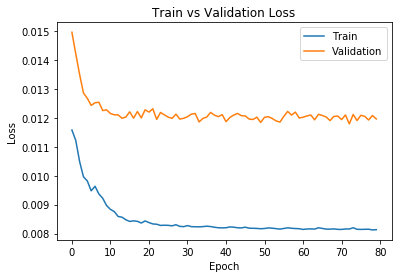

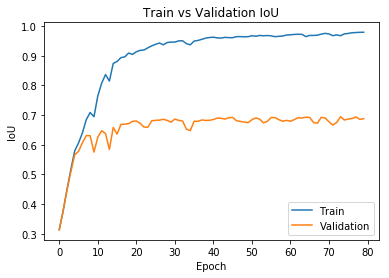

In [9]:
# Train
trainModel(model, train, valid, batch_size=batch_size, lr=lr, num_epochs=80, checkpoint=False, device=device)

In [10]:
model = model.eval()
model.to("cpu")
torch.save(model.state_dict(), "epoch80")
model_state = torch.load("epoch80")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


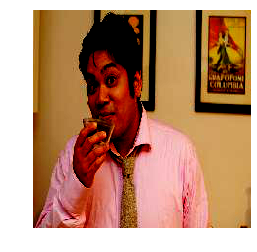

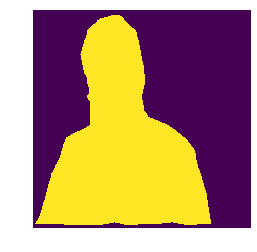

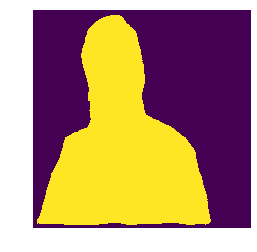

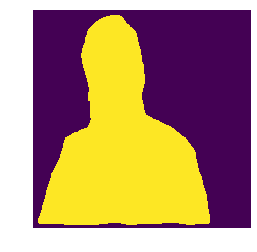

<Figure size 432x288 with 0 Axes>

In [11]:
model.to("cpu")

# After training (train set)
img, target = train_data[-112]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(model(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(np.transpose(img.squeeze(0).detach().numpy(), [1,2,0]))
imshow(target)
imshow(out)
imshow(denoised)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


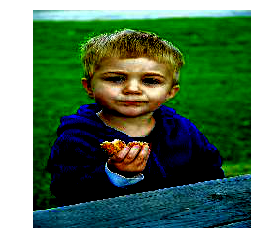

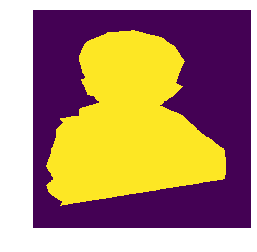

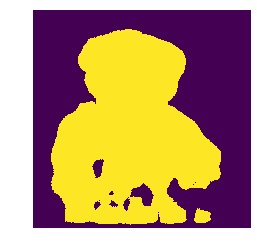

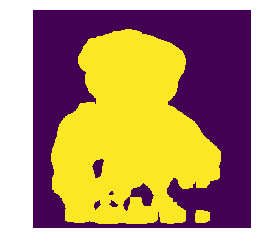

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  del sys.path[0]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


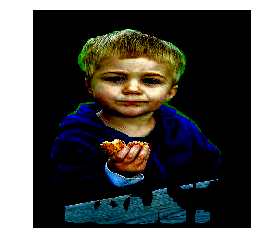

<Figure size 432x288 with 0 Axes>

In [12]:
# After training (validation set)
img, target = valid_data[-2]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(model(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(np.transpose(img.squeeze(0).detach().numpy(), [1,2,0]))
imshow(target)
imshow(out)
imshow(denoised)
imshow(np.expand_dims(denoised,axis=3)*np.transpose(img.squeeze(0).detach().numpy(), [1,2,0]))